In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm  

%matplotlib inline

Open netcdf file: 

In [2]:
ds = xr.open_dataset('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc')

Use one day as an example to look at how the different placement of the sensors affects the data

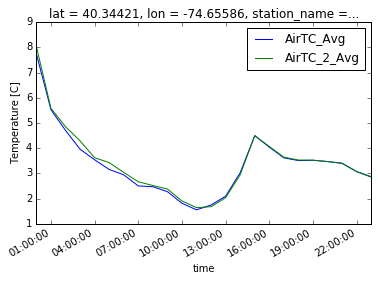

In [3]:
ds.AirTC_Avg.sel(time='2016-02-23').plot()
ds.AirTC_2_Avg.sel(time='2016-02-23').plot()
plt.ylabel('Temperature [C]')
plt.legend(loc='upper right');

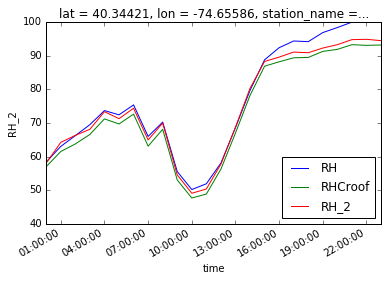

In [4]:
ds.RH.sel(time='2016-02-23').plot()
ds.RHCroof.sel(time='2016-02-23').plot()
ds.RH_2.sel(time='2016-02-23').plot()
plt.legend(loc='lower right');

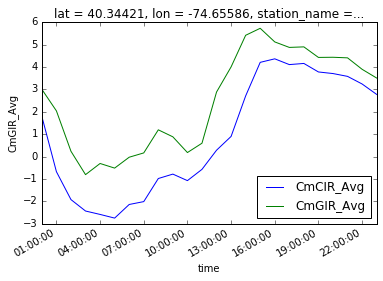

In [5]:
ds.CmCIR_Avg.sel(time='2016-02-23').plot()
ds.CmGIR_Avg.sel(time='2016-02-23').plot()
plt.legend(loc='lower right');

For more involved analyses we will need to convert from a xarray.dataset object to a pandas.dataframe object. To save time we will select the variables that we are interested in before we do any more work. In this example we are interested in air temperature, relative humidity, and infrared temperature.

In [6]:
Temp_and_RH_ds = ds[['AirTC_Avg', 'AirTC_2_Avg', 'RH', 'RHCroof','RH_2', 'CmCIR_Avg', 'CmGIR_Avg']]
df = Temp_and_RH_ds.to_dataframe().drop(['lon','lat','station_name'], axis=1)
df.describe(percentiles=[.1,.25,.5,.75,.9])

,AirTC_Avg,AirTC_2_Avg,RH,RHCroof,RH_2,CmCIR_Avg,CmGIR_Avg
count,44759.000000,44759.000000,44759.000000,44759.000000,44759.000000,44759.00000,44759.000000
mean,12.856004,12.953403,66.616582,65.202117,64.293099,12.69595,13.012428
std,10.273940,10.263287,24.085613,21.085004,21.000827,14.38901,11.810326
min,-17.900000,-17.930000,10.600000,10.800000,10.700000,-25.26000,-22.150000
10%,-0.614200,-0.523200,36.470000,36.808000,35.018000,-4.78160,-2.177000
25%,4.772000,4.914000,48.840000,48.545000,47.575000,1.81400,3.890500
50%,13.270000,13.390000,65.610000,64.880000,64.350000,11.90000,13.150000
75%,20.980000,21.090000,83.400000,83.100000,82.600000,21.08000,21.130000
90%,26.182000,26.270000,94.100000,93.400000,93.000000,32.66000,28.480000
max,40.770000,39.410000,160.700000,119.900000,100.000000,59.62000,50.180000


To make our lives easier, we can create a dictionary that contains the variable names as they are in the table above as well as the actual names that humans use. We will call this dictionary: names. Once we have created this dictionary, we can look up the data variables in it and get the human name.

In [7]:
names = {'AirTC_Avg': 'Air Temperature',
         'AirTC_2_Avg': 'Air Temperature',
         'RH': 'Relative Humidity',
         'RHCroof': 'Relative Humidity (conventional roof)',
         'RH_2': 'Relative Humidity (green roof)',
         'CmCIR_Avg': 'Infrared Skin Temperature (conventional roof)',
         'CmGIR_Avg': 'Infrared Skin Temperature (green roof)'}

Here is how it works:

In [8]:
names['CmGIR_Avg']

'Infrared Skin Temperature (green roof)'

Now we can easily make some classy boxplots

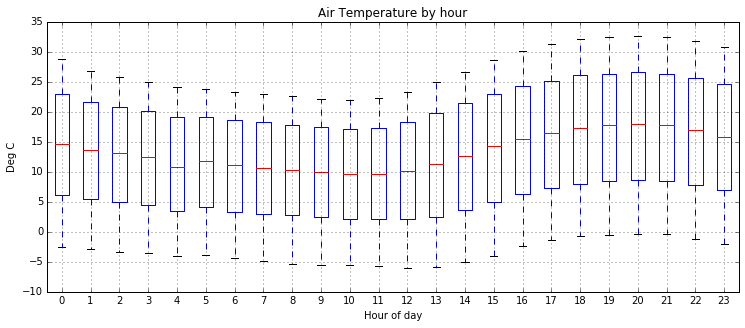

In [9]:
var = 'AirTC_Avg'
df.boxplot(column=var, by=df.index.hour, whis= [5, 95], sym='', figsize=(12,5))
plt.xlabel('Hour of day')
plt.ylabel(ds[var].units)
plt.title(names[var]+' by hour')
plt.suptitle('')
plt.show()

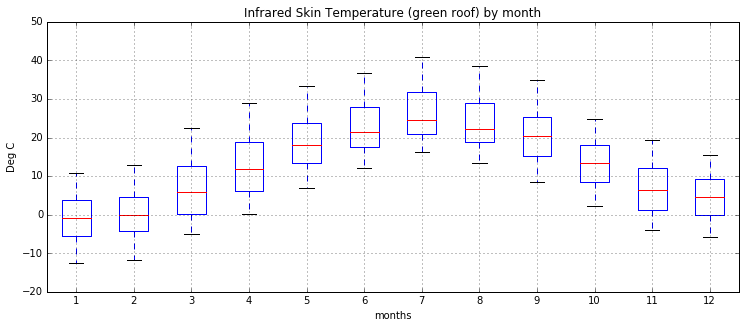

In [10]:
var = 'CmGIR_Avg'
df.boxplot(column=var, by=df.index.month, whis= [5, 95], sym='', figsize=(12,5))
plt.xlabel('months')
plt.ylabel(ds[var].units)
plt.title(names[var]+' by month')
plt.suptitle('')
plt.show()